In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def showimg(img, title=''):
    plt.imshow(img, cmap='gray')
    if title:
        plt.title(f"{title}")
    plt.show()

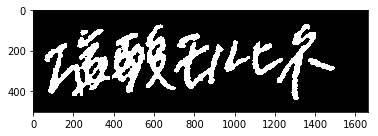

In [107]:
path = '/Users/binhna/Downloads/test/images/finesegment-pts.png'
path2 = '/Users/binhna/Downloads/kanji-pts.png'
image = cv2.imread(path2, 0)
_, img = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
img = 255 - img
showimg(img)

10


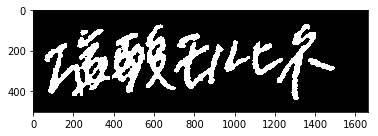

In [108]:
count = 0
arr_img = []
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(
        img.astype(np.uint8), connectivity=8)
#stats = sorted(stats, key=lambda x: x[0])
for i in range(1, ret):
    #if stats[i, cv2.CC_STAT_HEIGHT] >= 0.2*img.shape[0]:
    count+=1
    new_img = np.zeros_like(img)
    new_img[labels == i] = 1
    arr_img.append((new_img, stats[i]))
    #showimg(new_img)
print(count)
showimg(img)
arr_img = sorted(arr_img, key=lambda x: x[-1][0])

#for i in arr_img:
#    showimg(i[0])

In [109]:
result = []
reagion = []
tmp = arr_img[0][0]
bounding_left, bounding_right = arr_img[0][-1][0], arr_img[0][-1][0]+arr_img[0][-1][2]
for i_img in range(len(arr_img) -1):
    x2 = arr_img[i_img][-1][0]+arr_img[i_img][-1][2]
    #print(x2)
    x1 = arr_img[i_img+1][-1][0]
    #print(x1)
    smaller_width = arr_img[i_img][-1][2] if arr_img[i_img][-1][2] < arr_img[i_img+1][-1][2] else arr_img[i_img+1][-1][2]
    #print(smaller_width)
    condition = (x2-x1) > 0.5*smaller_width
    
    #print(condition)
    if condition:
        bounding_left = min(bounding_left, arr_img[i_img+1][-1][0])
        bounding_right = max(bounding_right, arr_img[i_img+1][-1][0]+arr_img[i_img+1][-1][2])
        tmp = tmp | arr_img[i_img+1][0]
    else:
        reagion.append((bounding_left, bounding_right))
        result.append(tmp)
        tmp = arr_img[i_img+1][0]
        bounding_left, bounding_right = arr_img[i_img+1][-1][0], arr_img[i_img+1][-1][0]+arr_img[i_img+1][-1][2]
    #if i_img == len(arr_img) - 2 and not condition:
    #    result.append(arr_img[-1][0])

reagion.append((bounding_left, bounding_right))
if condition:
    result.append(tmp)
else:
    result.append(arr_img[-1][0])
    
    

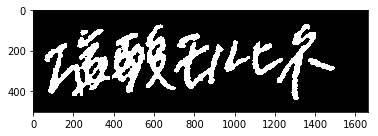

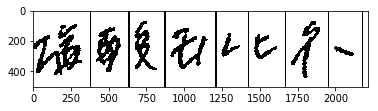

In [110]:
showimg(img)
pad_img = np.zeros_like(img)[:,:90]
pad_img[:,50:60] = 1
final_result = []
for i in range(len(result)):
    tmp_img = result[i][:,reagion[i][0]:reagion[i][1]]
    final_result.append(tmp_img)
    final_result.append(pad_img)
im_h = cv2.hconcat(final_result)
showimg(255-im_h)

In [17]:
len(arr_img)

10